In [6]:
import os
import numpy as np
import pandas as pd
import importlib
from psifr import fr
from cfr import framework

model_dir = '/Users/morton/Dropbox/work/cmr_cfr/cfr'
data_file = os.path.join(model_dir, 'cfr_mixed_eeg.csv')
patterns_file = os.path.join(model_dir, 'cfr_patterns.hdf5')
fit_dir = os.path.join(model_dir, 'fits', 'v4')
fig_dir = '/Users/morton/manuscripts/cfr/figs/cfr'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

## Load model fits

In [33]:
components = ['loc', 'cat', 'use', 'loc-cat', 'loc-use', 'cat-use', 'loc-cat-use']
base_models = [f'cmr_fcf-{comp}' for comp in components]
base_names = ['I', 'C', 'S', 'IC', 'IS', 'CS', 'ICS']

new_models = ['cmr_fcf-loc-cat_ff-use', 'cmr_fcf-loc_ff-cat-use',
              'cmr_fcf-loc-cat-use_ff-use', 'cmr_fcf-loc-cat_ff-cat-use', 'cmr_fcf-loc-cat-use_ff-cat-use']
new_names = ['IC-S', 'I-CS', 'ICS-S', 'IC-CS', 'ICS-CS']
#new_models = ['cmr_fcf-loc_ff-cat', 'cmr_fcf-loc_ff-use', 'cmr_fcf-loc_ff-cat-use']
#new_names = ['I-C', 'I-S', 'I-CS']
models = base_models + new_models
model_names = base_names + new_names
res1 = framework.read_model_fits(fit_dir1, models, model_names)
res1

rep  Afc  Acf  Aff       Dff    T     w_loc       Lfc  \
model  subject                                                          
I      1          2  0.0  0.0  0.0  1.000000  0.1  1.000000  0.188871   
       2          1  0.0  0.0  0.0  1.000000  0.1  1.000000  0.139566   
       3          1  0.0  0.0  0.0  1.000000  0.1  1.000000  0.084998   
       5          0  0.0  0.0  0.0  1.000000  0.1  1.000000  0.175249   
       8          2  0.0  0.0  0.0  1.000000  0.1  1.000000  0.115344   
...             ...  ...  ...  ...       ...  ...       ...       ...   
ICS-CS 42         2  0.0  0.0  0.0  0.171816  0.1  0.999088  0.044139   
       43         2  0.0  0.0  0.0  0.167173  0.1  0.999084  0.058051   
       44         0  0.0  0.0  0.0  0.077639  0.1  1.000000  0.028334   
       45         2  0.0  0.0  0.0  0.073472  0.1  0.998491  0.018541   
       46         0  0.0  0.0  0.0  0.094752  0.1  1.000000  0.114735   

                         Lcf        P1  ...         logl      n     k  \
model  subject                          ...                             
I      1        8.850760e-02  0.186258  ...  -899.540087  373.0   9.0   
       2        1.320660e-01  0.294150  ... -1014.021228  426.0   9.0   
       3        6.130060e-02  0.941383  ...  -927.932940  379.0   9.0   
       5        1.635574e-01  0.080227  ... -1218.473199  517.0   9.0   
       8        3.204213e-02  0.086330  ...  -784.548449  320.0   9.0   
...                      ...       ...  ...          ...    ...   ...   
ICS-CS 42       2.639631e-02  0.062763  ...  -732.302989  311.0  13.0   
       43       0.000000e+00  0.104089  ... -1009.202631  428.0  13.0   
       44       1.312626e-08  0.209935  ...  -854.673170  352.0  13.0   
       45       0.000000e+00  0.000000  ...  -892.286580  374.0  13.0   
       46       7.732212e-02  0.162094  ...  -978.741593  430.0  13.0   

                   w_cat     w_use        w0        w1     s_use        s0  \
model  subject                                                               
I      1             NaN       NaN       NaN       NaN       NaN       NaN   
       2             NaN       NaN       NaN       NaN       NaN       NaN   
       3             NaN       NaN       NaN       NaN       NaN       NaN   
       5             NaN       NaN       NaN       NaN       NaN       NaN   
       8             NaN       NaN       NaN       NaN       NaN       NaN   
...                  ...       ...       ...       ...       ...       ...   
ICS-CS 42       0.000912  0.004157  0.999088  0.004157  0.931449  0.068551   
       43       0.000916  0.002268  0.999084  0.002268  0.647951  0.352049   
       44       0.000000  0.000374  1.000000  0.000374  0.490738  0.509262   
       45       0.001509  0.001785  0.998491  0.001785  0.226935  0.773065   
       46       0.000000  0.001040  1.000000  0.001040  0.455527  0.544473   

                   s_cat  
model  subject            
I      1             NaN  
       2             NaN  
       3             NaN  
       5             NaN  
       8             NaN  
...                  ...  
ICS-CS 42       0.068551  
       43       0.352049  
       44       0.509262  
       45       0.773065  
       46       0.544473  

[348 rows x 28 columns]

In [30]:
res2 = framework.read_model_fits(fit_dir2, models, model_names)
res2

FileNotFoundError: [Errno 2] File /Users/morton/Dropbox/work/cmr_cfr/cfr/fits/v4/cmr_fcf-loc-cat-use_ff-use/fit.csv does not exist: '/Users/morton/Dropbox/work/cmr_cfr/cfr/fits/v4/cmr_fcf-loc-cat-use_ff-use/fit.csv'

In [25]:
comb = pd.concat([res1.logl, res2.logl], 1, keys=['v3', 'v4'])
comb

v3           v4
model subject                          
I     1        -899.540087  -899.540125
      2       -1014.021228 -1014.022667
      3        -927.932940  -927.932107
      5       -1218.473199 -1218.473198
      8        -784.548449  -784.550371
...                    ...          ...
ICS   42       -742.048291  -741.348011
      43      -1021.821807 -1022.037135
      44       -876.401697  -877.530383
      45       -921.667211  -922.965284
      46       -996.314451  -997.076068

[203 rows x 2 columns]

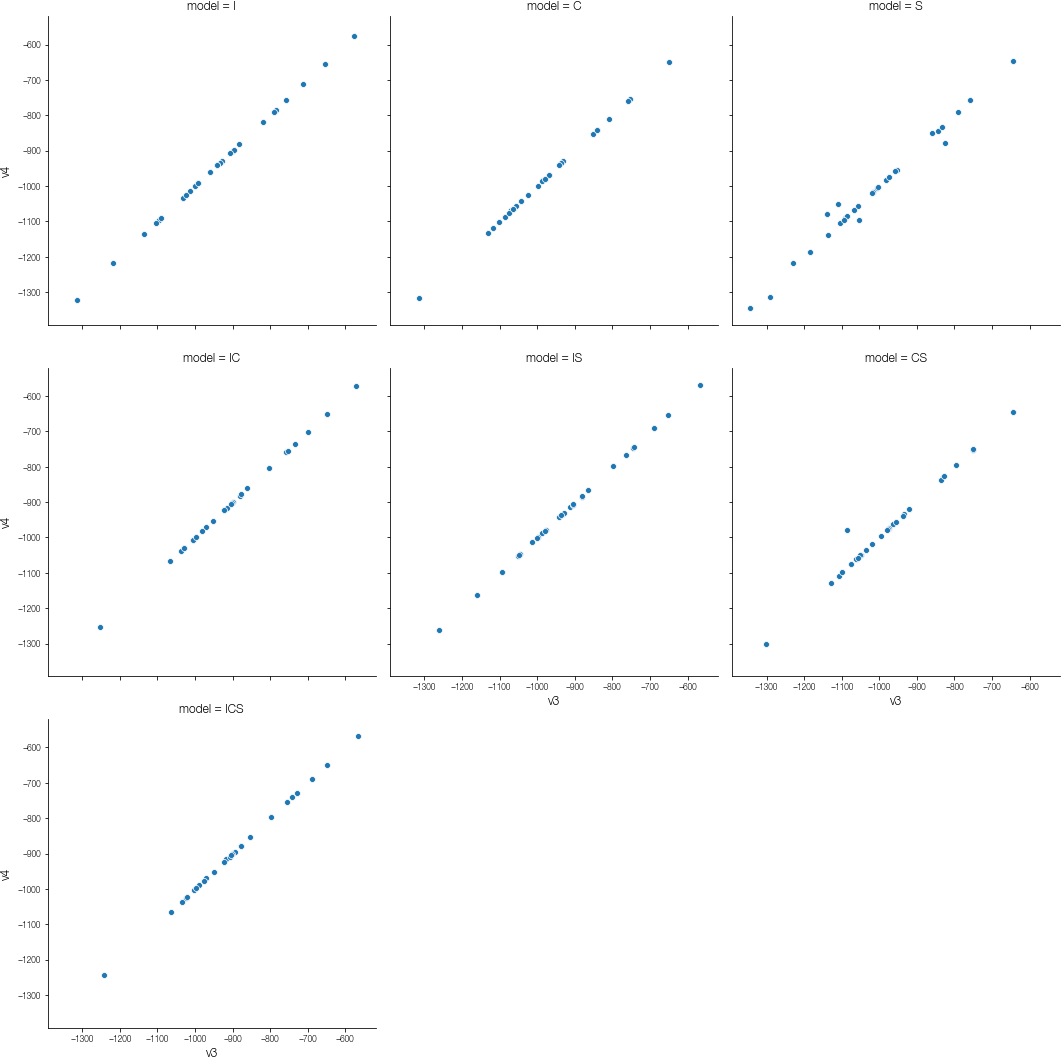

In [28]:
sns.relplot(x='v3', y='v4', col='model', col_wrap=3, data=comb.reset_index());

In [15]:
ind = (res1.logl - res2.logl).argmax()
print(res1.iloc[ind])
print(res2.iloc[ind])

rep          0.000000
Afc          0.000000
Acf          0.000000
Aff          0.000000
Dff          1.000000
T            0.100000
w_loc             NaN
Lfc          0.534038
Lcf          0.552923
P1           0.132905
P2           0.371453
B_enc        0.051252
B_start      0.000000
B_rec        0.970985
X1           0.012065
X2           0.275588
Dfc          0.465962
Dcf          0.447077
logl      -824.868144
n          319.000000
k            9.000000
w_cat             NaN
w_use        1.000000
w0                NaN
w1                NaN
Name: (S, 40), dtype: float64
rep          2.000000
T            0.100000
Lfc          0.484520
Lcf          0.476615
P1           0.415304
P2           1.341129
B_enc        0.455001
B_start      0.302625
B_rec        0.603251
X1           0.012278
X2           0.274119
Dfc          0.515480
Dcf          0.523385
logl      -877.768086
n          319.000000
k            9.000000
w0                NaN
w_loc             NaN
w_cat             NaN
w_

In [17]:
pd.concat([res1.iloc[ind], res2.iloc[ind]], axis=1)

S            
                 40          40
rep        0.000000    2.000000
Afc        0.000000         NaN
Acf        0.000000         NaN
Aff        0.000000         NaN
Dff        1.000000         NaN
T          0.100000    0.100000
w_loc           NaN         NaN
Lfc        0.534038    0.484520
Lcf        0.552923    0.476615
P1         0.132905    0.415304
P2         0.371453    1.341129
B_enc      0.051252    0.455001
B_start    0.000000    0.302625
B_rec      0.970985    0.603251
X1         0.012065    0.012278
X2         0.275588    0.274119
Dfc        0.465962    0.515480
Dcf        0.447077    0.523385
logl    -824.868144 -877.768086
n        319.000000  319.000000
k          9.000000    9.000000
w_cat           NaN         NaN
w_use      1.000000         NaN
w0              NaN         NaN
w1              NaN         NaN

## Calculate AIC weights

In [3]:
res['aic'] = framework.aic(res['logl'], res['n'], res['k'])
aic = res.reset_index().pivot(index='subject', columns='model', values='aic')
aic = aic.reindex(columns=model_names)
waic = aic.copy()
waic.iloc[:, :] = framework.waic(aic.to_numpy())

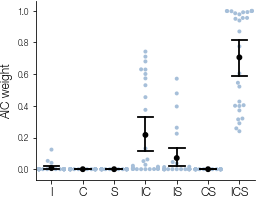

In [5]:
import importlib
import seaborn as sns
importlib.reload(sns)
importlib.reload(fr)
c = [.65, .75, .85]
df = waic.reset_index().melt(id_vars='subject', value_name='waic')
g = fr.plot_swarm_error(df, x='model', y='waic', height=3, aspect=1.2,
                        swarm_color=c, swarm_size=4)
g.set(ylabel='AIC weight');
g.axes[0, 0].tick_params(axis='x', labelsize='large')
g.savefig(os.path.join(fig_dir, 'waic2.pdf'))

## Create a parameter table

In [5]:
df = framework.read_model_specs(fit_dir, models, model_names)
free_param = df.reset_index().query("kind == 'free'")['param'].unique()

In [6]:
table = pd.DataFrame(index=free_param, columns=model_names)
model_stats = res.groupby('model').agg(['mean', 'sem'])
stop = ['rep', 'n', 'k', 'w0', 'w1', 'logl', 'aic']
fields = [col for col in res.columns if col not in stop]
for model in model_names:
    m = model_stats.loc[model]
    for field in free_param:
        f = m[field]
        if np.isnan(f['mean']):
            table.loc[field, model] = (f"---")
        else:
            table.loc[field, model] = f"{f['mean']:.2f} ({f['sem']:.2f})"
table

,I,C,S,IC,IS,CS,ICS
Lfc,0.13 (0.01),0.75 (0.01),0.60 (0.04),0.12 (0.01),0.15 (0.01),0.67 (0.02),0.13 (0.01)
Lcf,0.11 (0.01),0.80 (0.01),0.68 (0.02),0.11 (0.01),0.13 (0.01),0.70 (0.01),0.11 (0.01)
P1,0.27 (0.07),0.08 (0.01),0.28 (0.05),0.22 (0.05),0.21 (0.05),0.14 (0.03),0.23 (0.05)
P2,0.95 (0.15),0.41 (0.03),0.51 (0.08),1.73 (0.24),1.57 (0.25),0.38 (0.04),1.84 (0.27)
B_enc,0.72 (0.02),0.04 (0.00),0.14 (0.03),0.64 (0.02),0.67 (0.02),0.07 (0.02),0.60 (0.02)
B_start,0.67 (0.07),0.00 (0.00),0.06 (0.02),0.54 (0.08),0.63 (0.07),0.02 (0.01),0.48 (0.08)
B_rec,0.79 (0.02),0.96 (0.01),0.81 (0.06),0.90 (0.02),0.85 (0.02),0.93 (0.03),0.90 (0.02)
X1,0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00)
X2,0.31 (0.01),0.31 (0.01),0.31 (0.01),0.31 (0.01),0.31 (0.01),0.31 (0.01),0.31 (0.01)
w0,---,---,---,0.81 (0.01),0.70 (0.01),0.44 (0.03),0.84 (0.01)


In [7]:
total = res[['logl', 'n', 'k']].groupby('model').sum()
total = total.astype({'n': int, 'k': int})
total['aic'] = framework.aic(total['logl'], total['n'], total['k'])
total['waic'] = framework.waic(total['aic'].to_numpy(), 0)
output = pd.concat((table, total.T), axis=0)

In [8]:
latex_names = {
    'Lfc': 'L_{FC}',
    'Lcf': 'L_{CF}',
    'P1': 'P_1',
    'P2': 'P_2',
    'B_enc': r'\beta_{\mathrm{enc}}',
    'B_start': r'\beta_{\mathrm{start}}',
    'B_rec': r'\beta_{\mathrm{rec}}',
    'X1': 'X_1',
    'X2': 'X_2',
    'w0': 'w_1',
    'w1': 'w_2'
}
index = []
for row in output.index:
    if row in latex_names:
        name = latex_names[row]
    else:
        name = row
    index.append(name)
output.index = index
output.to_latex(os.path.join(fig_dir, 'parameters.tex'), escape=False)